In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def apply_filter(image, mask, mode="linear"):
    m, n = mask.shape
    pad_h, pad_w = m // 2, n // 2
    padded = cv2.copyMakeBorder(image, pad_h, pad_h, pad_w, pad_w, cv2.BORDER_REPLICATE)

    output = np.zeros_like(image, dtype=np.float32)

    # convolution
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded[i:i+m, j:j+n]

            if mode == "linear":
                output[i, j] = np.sum(region * mask)
            elif mode == "median":
                output[i, j] = np.median(region)
            elif mode == "mode":
                vals = region.ravel()
                if vals.size == 0:
                    output[i, j] = 0
                else:
                    output[i, j] = np.bincount(vals).argmax()
            elif mode == "min":
                output[i, j] = np.min(region)
            elif mode == "max":
                output[i, j] = np.max(region)

    
    output = np.clip(output, 0, 255).astype(np.uint8)

    return output



In [4]:
img1 = cv2.imread("Images/lenna.png", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("Images/road.bmp", cv2.IMREAD_GRAYSCALE)

# mask define

avg_mask = np.ones((3, 3), np.float32) / 9

weighted_mask = np.array([
    [1,2,3],
    [2,4,2],
    [1,2,1]
], np.float32) / 16

laplacian_mask = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
], np.float32)

sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], np.float32)

sobel_y = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
], np.float32)


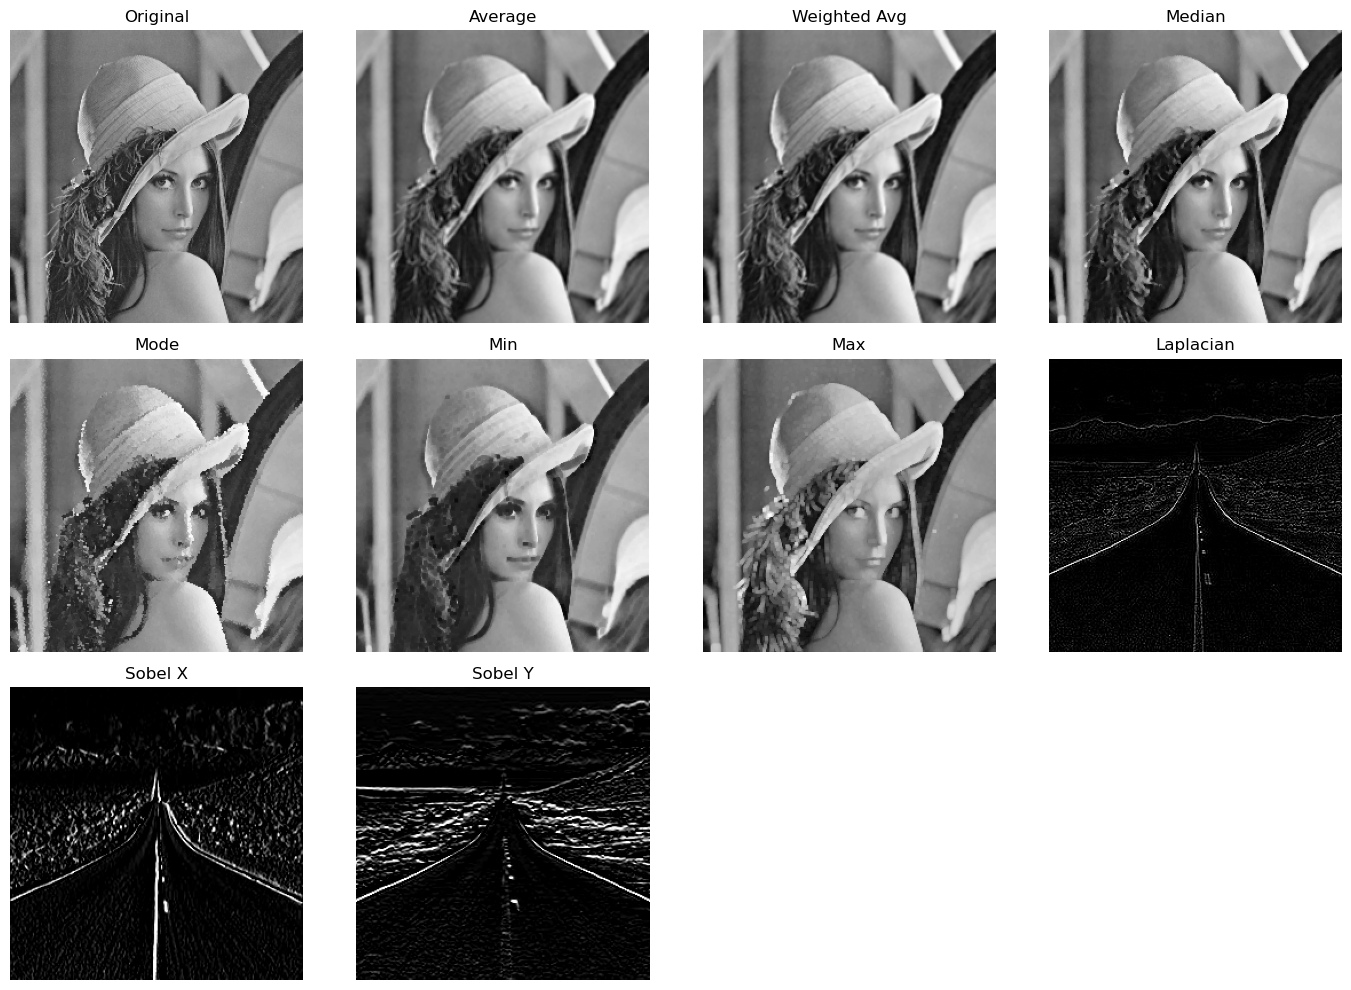

In [5]:
# Apply Filter

avg_img = apply_filter(img1, avg_mask, "linear")
weighted_img = apply_filter(img1, weighted_mask, "linear")

median_img = apply_filter(img1, avg_mask, "median")
mode_img = apply_filter(img1, avg_mask, "mode")
min_img = apply_filter(img1, avg_mask, "min")
max_img = apply_filter(img1, avg_mask, "max")

laplacian_img = apply_filter(img2, laplacian_mask, "linear")
sobelx_img = apply_filter(img2, sobel_x, "linear")
sobely_img = apply_filter(img2, sobel_y, "linear")


# output
titles = ["Original", "Average", "Weighted Avg", "Median", "Mode", "Min", "Max", "Laplacian", "Sobel X", "Sobel Y"]
images = [img1, avg_img, weighted_img, median_img, mode_img, min_img, max_img, laplacian_img, sobelx_img, sobely_img]

plt.figure(figsize=(14, 10))
for i in range(len(images)):
    plt.subplot(3, 4, i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()

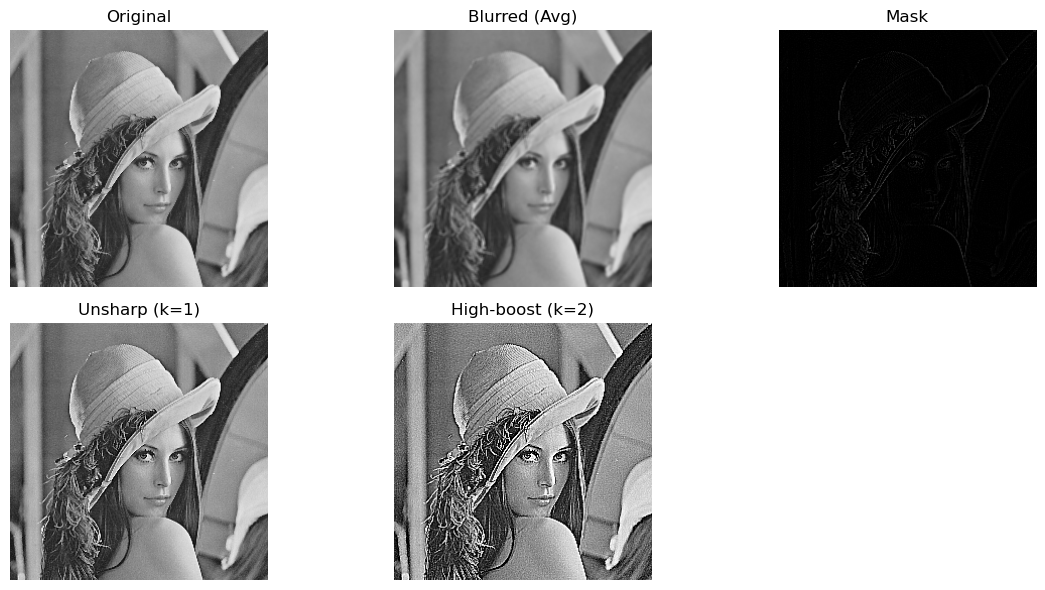

uint8
float32


In [ ]:
# Unsharp Masking
img1_f = img1.astype(np.float32)
avg_img = apply_filter(img1, avg_mask, "linear").astype(np.float32)
mask = img1_f - avg_img

unsharp = img1_f + mask

# High boost filtering
k = 5.0
high_boost = img1_f + k * (img1_f - avg_img)

# show result:
titles = ["Original", "Blurred (Avg)", "Mask", "Unsharp (k=1)", "High-boost (k=2)"]
images = [img1, avg_img.astype(np.uint8), mask, unsharp, high_boost]

plt.figure(figsize=(12, 6))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap="gray", vmin=0, vmax=255)
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()

print(img1.dtype)
print(avg_img.dtype)